<a href="https://colab.research.google.com/github/lakshitgosain/return_orders/blob/main/return_orders.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
#Importing Basic Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import files

In [3]:
file=files.upload()

Saving TrainingData_V1.csv to TrainingData_V1.csv


In [4]:
df=pd.read_csv('TrainingData_V1.csv')

In [5]:
df.head(5)

order_item_id  order_date delivery_date  ...  user_state user_reg_date return
0              1  22-06-2016    27-06-2016  ...        1013    23-06-2016      0
1             10  22-06-2016    27-06-2016  ...        1001    15-03-2015      1
2             11  22-06-2016    05-07-2016  ...        1001    15-03-2015      0
3             32  23-06-2016    26-06-2016  ...        1013    17-02-2015      0
4             43  23-06-2016    26-06-2016  ...        1006    09-02-2016      1

[5 rows x 14 columns]

In [6]:
df.describe()

order_item_id       item_id  ...    user_state        return
count   79945.000000  79945.000000  ...  79945.000000  79945.000000
mean    50056.599925    924.281231  ...   1007.268485      0.458590
std     28872.601957    702.577022  ...      4.281872      0.498285
min         1.000000      1.000000  ...   1001.000000      0.000000
25%     25133.000000    214.000000  ...   1002.000000      0.000000
50%     49985.000000    812.000000  ...   1008.000000      0.000000
75%     75118.000000   1582.000000  ...   1010.000000      1.000000
max    100000.000000   2241.000000  ...   1016.000000      1.000000

[8 rows x 7 columns]

In [7]:
df['item_color'].value_counts()

black       14920
blue         8496
brown        7024
grey         6959
red          5792
            ...  
avocado         4
caramel         4
creme           3
amethyst        3
opal            2
Name: item_color, Length: 77, dtype: int64

In [8]:
df.shape

(79945, 14)

#Exploratory Data Analysis

return
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: item_price, dtype: object

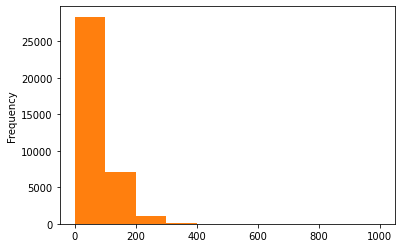

In [9]:
df.groupby('return')['item_price'].plot(kind='hist')

In [10]:
colors_counts=df['item_id'].value_counts()
color_counts_dict=df['item_color'].value_counts().nlargest(10)
color_counts=pd.DataFrame(color_counts_dict)
color_counts=color_counts.reset_index()

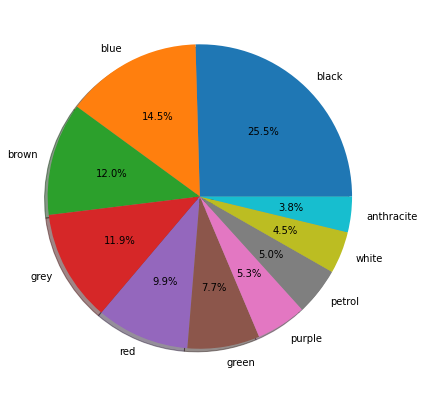

In [12]:
plt.figure(figsize=(10,7))
plt.pie(color_counts['item_color'],labels=color_counts['index'].tolist(),shadow=True,autopct='%1.1f%%')
plt.show()
#It would have been cool to display the colors and their names consistently, but color names like petrol are not defined in Matplotlib's colors

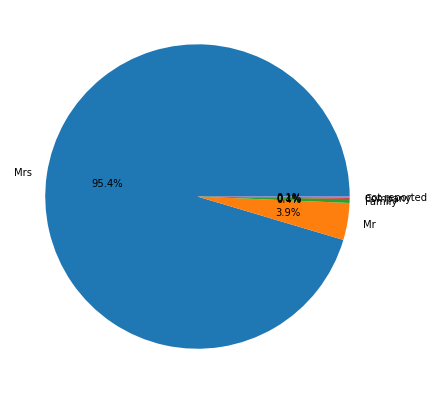

In [13]:
plt.figure(figsize=(10,7))
plt.pie(df.user_title.value_counts(),labels=df.user_title.value_counts().index,autopct='%1.1f%%',labeldistance=1.1)
plt.show()

<BarContainer object of 5 artists>

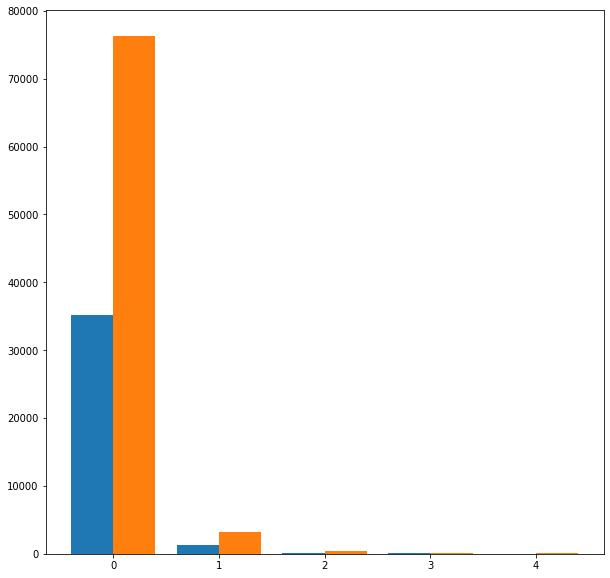

In [14]:
df.user_title.value_counts().index
bar=dict((df[df['return']==1]['user_title'].value_counts()/df['user_title'].value_counts())*100)
return_number=df[df['return']==1]['user_title'].value_counts().values
plt.figure(figsize=(10,10))
x_axis=np.arange(len(df.user_title.value_counts().index))
plt.bar(x=x_axis-0.2,height=return_number,width=0.4)
plt.bar(x=x_axis+0.2,height=df['user_title'].value_counts().values,width=0.4)

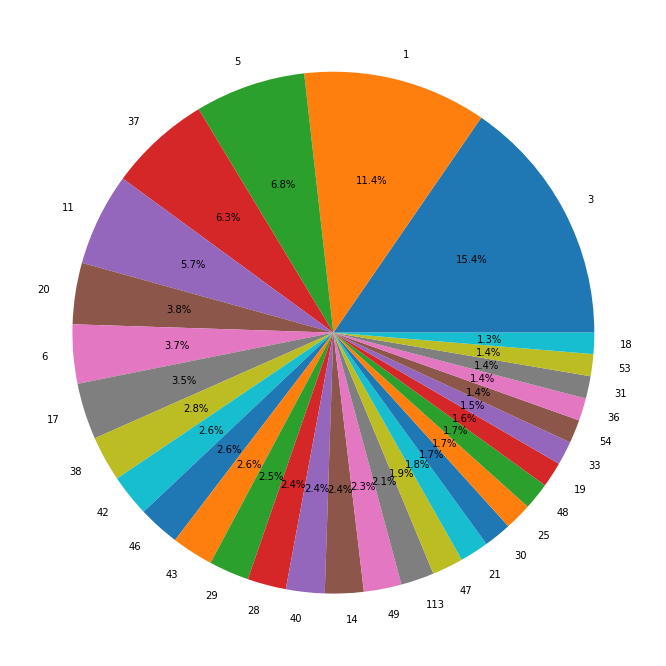

In [55]:
plt.figure(figsize=(12,12))
plt.pie(df['brand_id'].value_counts().nlargest(30),labels=df['brand_id'].value_counts().nlargest(30).keys(),autopct='%1.1f%%')
plt.show()

#Feature Engineering

In [15]:
df['user_reg_date']

0        23-06-2016
1        15-03-2015
2        15-03-2015
3        17-02-2015
4        09-02-2016
            ...    
79940    12-09-2016
79941    12-09-2016
79942    17-02-2015
79943    20-01-2016
79944    17-02-2015
Name: user_reg_date, Length: 79945, dtype: object

In [19]:
df['user_reg_date']=pd.to_datetime(df['user_reg_date'])

In [21]:
df['user_reg_date'].dt.year

0        2016
1        2015
2        2015
3        2015
4        2016
         ... 
79940    2016
79941    2016
79942    2015
79943    2016
79944    2015
Name: user_reg_date, Length: 79945, dtype: int64

In [22]:
df['user_reg_date'].dt.month

0         6
1         3
2         3
3         2
4         9
         ..
79940    12
79941    12
79942     2
79943     1
79944     2
Name: user_reg_date, Length: 79945, dtype: int64

In [23]:
df['user_reg_date'].dt.day

0        23
1        15
2        15
3        17
4         2
         ..
79940     9
79941     9
79942    17
79943    20
79944    17
Name: user_reg_date, Length: 79945, dtype: int64

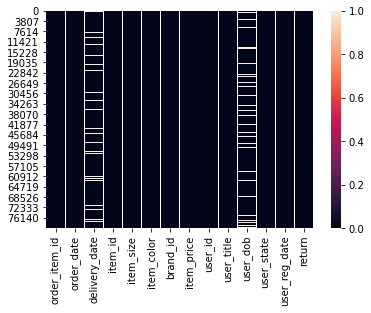

In [26]:
sns.heatmap(df.isna())#Easy way to find out the nulls in a Dataset

In [27]:
df_copy=df.copy()

In [28]:
df_copy['delivery_date'].isna()

0        False
1        False
2        False
3        False
4        False
         ...  
79940    False
79941     True
79942    False
79943    False
79944    False
Name: delivery_date, Length: 79945, dtype: bool

In [30]:
order_date1=pd.to_datetime(df_copy['order_date'],format='%d-%m-%Y')


In [36]:
delivery_date1=pd.to_datetime(df_copy['delivery_date'],format='%d-%m-%Y')

In [37]:
delivery_gap=delivery_date1-order_date1

In [38]:
df_copy['delivery_gap']=delivery_gap

In [39]:
df_copy[df_copy['delivery_gap']==df_copy['delivery_gap'].min()]

order_item_id  order_date  ... return  delivery_gap
9974           99998  11-09-2016  ...      0    -7925 days
39989          99838  11-09-2016  ...      0    -7925 days
39990          99839  11-09-2016  ...      0    -7925 days
60106          99928  11-09-2016  ...      1    -7925 days
70072          99999  11-09-2016  ...      0    -7925 days

[5 rows x 15 columns]

In [40]:
#Delivery Days in Negative...There is something Wrong Here...Let's Check

In [41]:
drop_negative_date=df_copy[df_copy['delivery_date']<df_copy['order_date']]

In [43]:
df_copy.drop(drop_negative_rows,axis=0,inplace=True)

NameError: ignored

In [45]:
df_copy['delivery_date_temp']=pd.to_datetime(df_copy['delivery_date'],format='%d-%m-%Y')
df_copy['order_date_temp']=pd.to_datetime(df_copy['order_date'],format='%d-%m-%Y')

In [46]:
drop_negative_rows=df_copy[df_copy['delivery_date_temp']<df_copy['order_date_temp']].index

In [47]:
df_copy.drop(drop_negative_rows,axis=0,inplace=True)

In [48]:
df_copy.delivery_gap.mean()

Timedelta('7 days 09:06:50.370763155')

We have found the average Delivery Time as 7 Days.
This is after we have dropped the Problematic Date Fields
** We can use the average days as a mean to fill in the Nulls

In [49]:
df_copy.delivery_gap.value_counts().nlargest(20)

2 days     15103
3 days     13655
1 days     13291
4 days     10038
5 days      4018
6 days      1263
7 days       959
8 days       711
9 days       677
11 days      635
10 days      622
12 days      529
13 days      469
19 days      462
14 days      440
17 days      436
21 days      434
15 days      404
18 days      398
20 days      394
Name: delivery_gap, dtype: int64

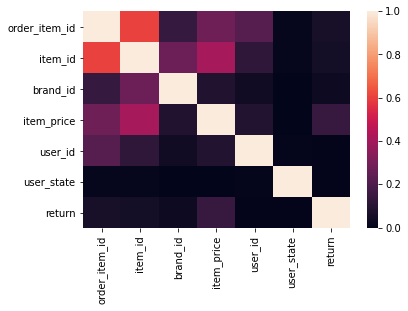

In [52]:
sns.heatmap(df.corr())

In [53]:
df.item_id.value_counts()

1415    851
1532    777
22      662
1401    545
100     545
       ... 
1036      1
2013      1
1452      1
1395      1
1002      1
Name: item_id, Length: 1902, dtype: int64

In [56]:
#Function to check and return Id columns with distinct Ids
def check_unique_ids(dataframe,cols):
    column_list=cols
    unique_length_dict={}
    df=dataframe
    
    for i in column_list:
        unique_length=len(df[i].value_counts().unique())
        unique_length_dict[i]=unique_length
        if unique_length==1:
            return list(unique_length_dict.keys())
        
    #return unique_length_dict

In [57]:
colums_with_ids=[i for i in df.columns if 'id' in i ]
#check_unique_ids(['order_item_id','item_id')

In [58]:
colums_with_ids

['order_item_id', 'item_id', 'brand_id', 'user_id']

In [60]:
#Function to check and convert DateType Columns
def check_for_date_cols(dataframe):
    df=dataframe
    columns=df.columns
    cols_with_dates=[i for i in df.columns if 'date' in i]
    _cols_with_dates=[i for i in df.columns if 'dob' in i]
    for _cols in _cols_with_dates:
        cols_with_dates.append(str(_cols))
    
    
    for x in cols_with_dates:
        df[x]=pd.to_datetime(df[x],format='%d-%m-%Y')
    return df

In [61]:
check_for_date_cols(df)

order_item_id order_date delivery_date  ...  user_state user_reg_date return
0                  1 2016-06-22    2016-06-27  ...        1013    2016-06-23      0
1                 10 2016-06-22    2016-06-27  ...        1001    2015-03-15      1
2                 11 2016-06-22    2016-07-05  ...        1001    2015-03-15      0
3                 32 2016-06-23    2016-06-26  ...        1013    2015-02-17      0
4                 43 2016-06-23    2016-06-26  ...        1006    2016-09-02      1
...              ...        ...           ...  ...         ...           ...    ...
79940          99942 2016-09-11    2016-09-12  ...        1007    2016-12-09      1
79941          99954 2016-09-11           NaT  ...        1007    2016-12-09      0
79942          99980 2016-09-11    2016-09-12  ...        1010    2015-02-17      0
79943          99987 2016-09-11    2016-09-12  ...        1008    2016-01-20      0
79944          99997 2016-09-11    2016-09-12  ...        1011    2015-02-17      0

[79945 rows x 14 columns]

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79945 entries, 0 to 79944
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   order_item_id  79945 non-null  int64         
 1   order_date     79945 non-null  datetime64[ns]
 2   delivery_date  72509 non-null  datetime64[ns]
 3   item_id        79945 non-null  int64         
 4   item_size      79945 non-null  object        
 5   item_color     79945 non-null  object        
 6   brand_id       79945 non-null  int64         
 7   item_price     79945 non-null  float64       
 8   user_id        79945 non-null  int64         
 9   user_title     79945 non-null  object        
 10  user_dob       72956 non-null  datetime64[ns]
 11  user_state     79945 non-null  int64         
 12  user_reg_date  79945 non-null  datetime64[ns]
 13  return         79945 non-null  int64         
dtypes: datetime64[ns](4), float64(1), int64(6), object(3)
memory usage: 8.

In [63]:
for i in df.columns:
    print(i ,len(df[i].value_counts().values))
    

order_item_id 79945
order_date 82
delivery_date 122
item_id 1902
item_size 102
item_color 77
brand_id 134
item_price 247
user_id 18292
user_title 5
user_dob 9007
user_state 16
user_reg_date 572
return 2


In [65]:
return_freq=dict(df[df['return']==1]['user_id'].value_counts())
#Return Frequency of each user

In [66]:
df[df['return']==0]['user_id'].value_counts()

18912    100
5006      65
9366      48
7983      47
32192     47
        ... 
43167      1
47137      1
22557      1
8366       1
44794      1
Name: user_id, Length: 15310, dtype: int64

In [67]:
total_users=dict(df['user_id'].value_counts())

In [68]:
return_user_rate={}
for i in return_freq:
    return_user_rate[i]=return_freq[i]/total_users[i]

In [69]:
return_user_rate

{824: 0.8596491228070176,
 5299: 0.6984126984126984,
 18912: 0.3055555555555556,
 11714: 0.8636363636363636,
 4390: 0.8636363636363636,
 744: 0.5205479452054794,
 31185: 0.5757575757575758,
 6663: 0.5873015873015873,
 30828: 0.9210526315789473,
 16730: 0.7333333333333333,
 39529: 0.9428571428571428,
 22100: 0.4647887323943662,
 4139: 0.4507042253521127,
 2040: 0.8611111111111112,
 20118: 0.6739130434782609,
 27390: 0.6078431372549019,
 18195: 0.875,
 22169: 0.8235294117647058,
 31746: 0.7297297297297297,
 14716: 0.7714285714285715,
 12460: 0.6428571428571429,
 10787: 0.5416666666666666,
 22287: 0.4482758620689655,
 34762: 0.8666666666666667,
 37972: 0.8928571428571429,
 878: 0.49019607843137253,
 40264: 0.8064516129032258,
 31904: 0.8571428571428571,
 17508: 0.4528301886792453,
 9366: 0.3333333333333333,
 1173: 0.6,
 36824: 0.3582089552238806,
 5006: 0.2696629213483146,
 8349: 0.6571428571428571,
 5065: 0.5609756097560976,
 36557: 0.7666666666666667,
 16647: 0.6216216216216216,
 2657: 

#Modeling

In [70]:
df_modeling_1=df.copy()

In [71]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler, StandardScaler

In [72]:
ct=make_column_transformer(
    (MinMaxScaler(),['item_price','brand_id','user_state']),
    (OneHotEncoder(handle_unknown='ignore'),['user_title','item_color','item_size'])
)

In [73]:
df_modeling_1_X=df_modeling_1.drop(['return'],axis=1)
df_modeling_1_y=df_modeling_1['return']

In [74]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df_modeling_1_X,df_modeling_1_y,test_size=0.2)

In [75]:
from sklearn.linear_model import LogisticRegression

In [76]:
LogRegresssor=LogisticRegression()

In [77]:
LogRegresssor.fit(X_train,y_train)

TypeError: ignored

In [78]:
ct.fit(X_train)

ColumnTransformer(n_jobs=None, remainder='drop', sparse_threshold=0.3,
                  transformer_weights=None,
                  transformers=[('minmaxscaler',
                                 MinMaxScaler(copy=True, feature_range=(0, 1)),
                                 ['item_price', 'brand_id', 'user_state']),
                                ('onehotencoder',
                                 OneHotEncoder(categories='auto', drop=None,
                                               dtype=<class 'numpy.float64'>,
                                               handle_unknown='ignore',
                                               sparse=True),
                                 ['user_title', 'item_color', 'item_size'])],
                  verbose=False)

In [79]:
X_train_transformed=ct.transform(X_train)

In [80]:
X_test_transformed=ct.transform(X_test)

In [82]:
X_train_transformed.toarray()[5]

array([0.27017017, 0.39416058, 0.4       , 0.        , 0.        ,
       0.        , 1.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 1.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [83]:
#Look at the above....sucha a sparse Matrix....But we just started and will impove along the way

In [84]:
LogRegresssor.fit(X_train_transformed,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [85]:
#To Resolve the above issue, try using max_iters=1000

In [86]:
LogRegresssor=LogisticRegression(max_iter=10000)

In [87]:
LogRegresssor.fit(X_train_transformed,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [88]:
y_preds=LogRegresssor.predict(X_test_transformed)

In [89]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [90]:
cm=confusion_matrix(y_test,y_preds)

In [91]:
cm

array([[6635, 2003],
       [4883, 2468]])

In [92]:
accurac_score=accuracy_score(y_test,y_preds)

In [93]:
accurac_score

0.5693289136281193

In [94]:
#Okay just 56% Accuracy,.....not good at all....let's try sometiing else

In [95]:
from sklearn.metrics import classification_report

In [96]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.58      0.77      0.66      8638
           1       0.55      0.34      0.42      7351

    accuracy                           0.57     15989
   macro avg       0.56      0.55      0.54     15989
weighted avg       0.56      0.57      0.55     15989



In [97]:
X_train,X_test,y_train,y_test=train_test_split(df_modeling_1_X,df_modeling_1_y,test_size=0.2,random_state=42)

In [103]:
df_modeling_1_X
#Bringing the Date Columns Back

order_item_id order_date  ... user_state  user_reg_date
0                  1 2016-06-22  ...       1013     2016-06-23
1                 10 2016-06-22  ...       1001     2015-03-15
2                 11 2016-06-22  ...       1001     2015-03-15
3                 32 2016-06-23  ...       1013     2015-02-17
4                 43 2016-06-23  ...       1006     2016-09-02
...              ...        ...  ...        ...            ...
79940          99942 2016-09-11  ...       1007     2016-12-09
79941          99954 2016-09-11  ...       1007     2016-12-09
79942          99980 2016-09-11  ...       1010     2015-02-17
79943          99987 2016-09-11  ...       1008     2016-01-20
79944          99997 2016-09-11  ...       1011     2015-02-17

[79945 rows x 13 columns]

In [99]:
ct.fit(X_train)

ColumnTransformer(n_jobs=None, remainder='drop', sparse_threshold=0.3,
                  transformer_weights=None,
                  transformers=[('minmaxscaler',
                                 MinMaxScaler(copy=True, feature_range=(0, 1)),
                                 ['item_price', 'brand_id', 'user_state']),
                                ('onehotencoder',
                                 OneHotEncoder(categories='auto', drop=None,
                                               dtype=<class 'numpy.float64'>,
                                               handle_unknown='ignore',
                                               sparse=True),
                                 ['user_title', 'item_color', 'item_size'])],
                  verbose=False)

In [100]:
X_train_transformed=ct.transform(X_train)
X_test_transformed=ct.transform(X_test)


In [101]:
LogRegresssor.fit(X_train_transformed,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [102]:
y_preds_logr=LogRegresssor.predict(X_test_transformed)

In [104]:
cm=confusion_matrix(y_test,y_preds)

In [105]:
cm

array([[6253, 2421],
       [5265, 2050]])

In [106]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.54      0.72      0.62      8674
           1       0.46      0.28      0.35      7315

    accuracy                           0.52     15989
   macro avg       0.50      0.50      0.48     15989
weighted avg       0.50      0.52      0.50     15989



In [107]:
#Oh No....Gotten Worse....Let's try something Else

In [108]:
from sklearn.tree import DecisionTreeClassifier

In [109]:
Decision_tree_classifier=DecisionTreeClassifier()

In [110]:
Decision_tree_classifier.fit(X_train_transformed,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [111]:
y_preds=Decision_tree_classifier.predict(X_test_transformed)

In [112]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.59      0.64      0.61      8674
           1       0.52      0.46      0.49      7315

    accuracy                           0.56     15989
   macro avg       0.56      0.55      0.55     15989
weighted avg       0.56      0.56      0.56     15989



In [113]:
from sklearn.ensemble import RandomForestClassifier

In [114]:
randfrstclassifier=RandomForestClassifier()

In [115]:
randfrstclassifier.fit(X_train_transformed,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [116]:
y_pred=randfrstclassifier.predict(X_test_transformed)

In [117]:
print(accuracy_score(y_test,y_pred))

0.565388704734505


In [118]:
#58%...Ok Getting better

In [119]:
from xgboost import XGBClassifier

In [120]:
xgb=XGBClassifier(n_estimators=1000)
xgb.fit(X_train_transformed,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=1000, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [121]:
y_preds=xgb.predict(X_test_transformed)

In [122]:
print(accuracy_score(y_test,y_preds))

0.6006004127837888


62%.....That's a lot better than before

In [123]:
X_train

order_item_id order_date  ... user_state  user_reg_date
37802          78327 2016-08-23  ...       1008     2015-02-17
12047          20598 2016-06-30  ...       1005     2016-05-14
78024          80268 2016-08-25  ...       1008     2015-06-24
22392          24678 2016-07-02  ...       1015     2015-02-17
51584          15011 2016-06-29  ...       1002     2016-06-30
...              ...        ...  ...        ...            ...
6265           62610 2016-08-10  ...       1001     2016-08-04
54886          47635 2016-08-01  ...       1014     2016-04-29
76820          68470 2016-08-13  ...       1013     2015-02-17
860             8697 2016-06-27  ...       1011     2015-03-11
15795          57986 2016-08-07  ...       1010     2015-02-17

[63956 rows x 13 columns]

In [125]:
df_modeling_2=df.copy()

In [126]:
#As we noticed, the avg. days fo delivery were 7 days....Let's use it to fill in inconsistent data and for training data

In [128]:
df_modeling_2['delivery_days']=0

In [129]:
for i in range(len(df_modeling_2)):
    if df_modeling_2['delivery_date'][i]<df['order_date'][i]:
        df_modeling_2['delivery_days'][i]=7
    else:
        df_modeling_2['delivery_days'][i]=(df_modeling_2['delivery_date'][i]-df['order_date'][i]).days
    

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoi

In [130]:
df_modeling_2

order_item_id order_date  ... return  delivery_days
0                  1 2016-06-22  ...      0            5.0
1                 10 2016-06-22  ...      1            5.0
2                 11 2016-06-22  ...      0           13.0
3                 32 2016-06-23  ...      0            3.0
4                 43 2016-06-23  ...      1            3.0
...              ...        ...  ...    ...            ...
79940          99942 2016-09-11  ...      1            1.0
79941          99954 2016-09-11  ...      0            NaN
79942          99980 2016-09-11  ...      0            1.0
79943          99987 2016-09-11  ...      0            1.0
79944          99997 2016-09-11  ...      0            1.0

[79945 rows x 15 columns]

In [131]:
df_modeling_2.delivery_days.isna().sum()

7436

In [132]:
df_modeling_2.delivery_days=df_modeling_2.delivery_days.fillna(7.0)

In [133]:
df_modeling_2

order_item_id order_date  ... return  delivery_days
0                  1 2016-06-22  ...      0            5.0
1                 10 2016-06-22  ...      1            5.0
2                 11 2016-06-22  ...      0           13.0
3                 32 2016-06-23  ...      0            3.0
4                 43 2016-06-23  ...      1            3.0
...              ...        ...  ...    ...            ...
79940          99942 2016-09-11  ...      1            1.0
79941          99954 2016-09-11  ...      0            7.0
79942          99980 2016-09-11  ...      0            1.0
79943          99987 2016-09-11  ...      0            1.0
79944          99997 2016-09-11  ...      0            1.0

[79945 rows x 15 columns]

In [137]:
df_modeling_2.user_dob.ffill(inplace=True)

In [138]:
df_modeling_2

order_item_id order_date  ... return  delivery_days
0                  1 2016-06-22  ...      0            5.0
1                 10 2016-06-22  ...      1            5.0
2                 11 2016-06-22  ...      0           13.0
3                 32 2016-06-23  ...      0            3.0
4                 43 2016-06-23  ...      1            3.0
...              ...        ...  ...    ...            ...
79940          99942 2016-09-11  ...      1            1.0
79941          99954 2016-09-11  ...      0            7.0
79942          99980 2016-09-11  ...      0            1.0
79943          99987 2016-09-11  ...      0            1.0
79944          99997 2016-09-11  ...      0            1.0

[79945 rows x 15 columns]

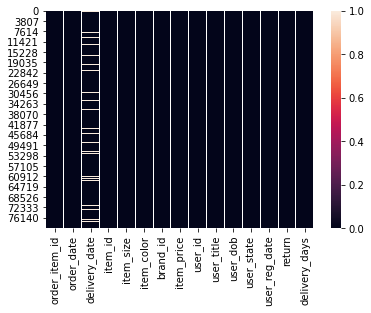

In [139]:
sns.heatmap(df_modeling_2.isna())

In [142]:
#We will extract the user's age from user_dob...We are not going to with them Happy Bithdays
import datetime

In [143]:
df_modeling_2['user_age']=datetime.date.today().year-df_modeling_2['user_dob'].dt.year

In [144]:
df_modeling_2

order_item_id order_date delivery_date  ...  return delivery_days user_age
0                  1 2016-06-22    2016-06-27  ...       0           5.0       52
1                 10 2016-06-22    2016-06-27  ...       1           5.0       51
2                 11 2016-06-22    2016-07-05  ...       0          13.0       51
3                 32 2016-06-23    2016-06-26  ...       0           3.0       61
4                 43 2016-06-23    2016-06-26  ...       1           3.0       61
...              ...        ...           ...  ...     ...           ...      ...
79940          99942 2016-09-11    2016-09-12  ...       1           1.0       80
79941          99954 2016-09-11           NaT  ...       0           7.0       59
79942          99980 2016-09-11    2016-09-12  ...       0           1.0       50
79943          99987 2016-09-11    2016-09-12  ...       0           1.0       50
79944          99997 2016-09-11    2016-09-12  ...       0           1.0       62

[79945 rows x 16 columns]

In [145]:
df_modeling_3=df_modeling_2.copy()#Creating a checkpoint for the Data

In [146]:
df_modeling_3.drop(['delivery_date','order_date','user_dob'],axis=1,inplace=True)

In [147]:
df_modeling_3_X=df_modeling_3.drop(['return'],axis=1)
df_modeling_3_y=df_modeling_3['return']

In [148]:
ct=make_column_transformer(
    (OneHotEncoder(),['user_title','item_color','item_size','user_state']),
    (StandardScaler(),['item_price','item_id','brand_id','delivery_days','user_age'])
    )
    

In [149]:
X_train,X_test,y_train,y_test=train_test_split(df_modeling_3_X,df_modeling_3_y,test_size=0.2,random_state=42)

In [150]:
df_modeling_3_X

order_item_id  item_id item_size  ... user_reg_date  delivery_days  user_age
0                  1      643        38  ...    2016-06-23            5.0        52
1                 10      195       xxl  ...    2015-03-15            5.0        51
2                 11       25       xxl  ...    2015-03-15           13.0        51
3                 32      173         m  ...    2015-02-17            3.0        61
4                 43      394        40  ...    2016-09-02            3.0        61
...              ...      ...       ...  ...           ...            ...       ...
79940          99942       39        41  ...    2016-12-09            1.0        80
79941          99954     1498        42  ...    2016-12-09            7.0        59
79942          99980     1806   unsized  ...    2015-02-17            1.0        50
79943          99987     1530         l  ...    2016-01-20            1.0        50
79944          99997      156        20  ...    2015-02-17            1.0        62

[79945 rows x 12 columns]

In [151]:
ct.fit(df_modeling_3_X)

ColumnTransformer(n_jobs=None, remainder='drop', sparse_threshold=0.3,
                  transformer_weights=None,
                  transformers=[('onehotencoder',
                                 OneHotEncoder(categories='auto', drop=None,
                                               dtype=<class 'numpy.float64'>,
                                               handle_unknown='error',
                                               sparse=True),
                                 ['user_title', 'item_color', 'item_size',
                                  'user_state']),
                                ('standardscaler',
                                 StandardScaler(copy=True, with_mean=True,
                                                with_std=True),
                                 ['item_price', 'item_id', 'brand_id',
                                  'delivery_days', 'user_age'])],
                  verbose=False)

In [152]:
X_train_transformed=ct.transform(X_train)
X_test_transformed=ct.transform(X_test)

In [153]:
Logclassifier=LogisticRegression(max_iter=10000)
Logclassifier.fit(X_train_transformed,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [154]:
y_preds=Logclassifier.predict(X_test_transformed)

In [155]:
cm=confusion_matrix(y_test,y_preds)

In [156]:
cm

array([[6564, 2110],
       [4711, 2604]])

In [157]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.58      0.76      0.66      8674
           1       0.55      0.36      0.43      7315

    accuracy                           0.57     15989
   macro avg       0.57      0.56      0.55     15989
weighted avg       0.57      0.57      0.56     15989



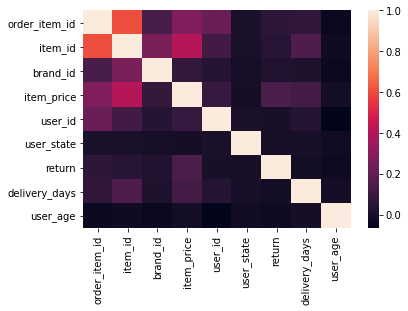

In [158]:
sns.heatmap(df_modeling_3.corr())

In [159]:
Decision_tree_classifier=DecisionTreeClassifier()

In [160]:
Decision_tree_classifier.fit(X_train_transformed,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [161]:
y_preds=Logclassifier.predict(X_test_transformed)

In [162]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.58      0.76      0.66      8674
           1       0.55      0.36      0.43      7315

    accuracy                           0.57     15989
   macro avg       0.57      0.56      0.55     15989
weighted avg       0.57      0.57      0.56     15989



In [163]:
randfrstclassifier=RandomForestClassifier()
randfrstclassifier.fit(X_train_transformed,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [164]:
y_pred=randfrstclassifier.predict(X_test_transformed)

In [165]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.58      0.76      0.66      8674
           1       0.55      0.36      0.43      7315

    accuracy                           0.57     15989
   macro avg       0.57      0.56      0.55     15989
weighted avg       0.57      0.57      0.56     15989



In [166]:
xgb=XGBClassifier(n_estimators=1000)
xgb.fit(X_train_transformed,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=1000, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [167]:
y_preds=xgb.predict(X_test_transformed)

In [168]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.69      0.63      0.66      8674
           1       0.60      0.67      0.63      7315

    accuracy                           0.64     15989
   macro avg       0.65      0.65      0.64     15989
weighted avg       0.65      0.64      0.65     15989



In [169]:
df_modeling_3['kfold']=-1

In [170]:
df_modeling_3.sample(frac=1).reset_index(drop=True)

order_item_id  item_id item_size  ... delivery_days  user_age  kfold
0              92497     1526         m  ...           2.0        43     -1
1              24502      279       xxl  ...           2.0        58     -1
2              19178     1329        37  ...           3.0        71     -1
3              85568      853       xxl  ...           9.0        45     -1
4              67488     1512        xl  ...           1.0        73     -1
...              ...      ...       ...  ...           ...       ...    ...
79940          28340        9        5+  ...           2.0        50     -1
79941          92053     1445         s  ...           2.0        54     -1
79942          16884      600        26  ...           4.0        64     -1
79943          84223       90        37  ...           2.0        54     -1
79944          43023      683   unsized  ...           1.0        63     -1

[79945 rows x 14 columns]

In [171]:
from sklearn.model_selection import KFold

In [172]:
kf=KFold(n_splits=5)

In [173]:
for fold,(trn_,val_) in enumerate(kf.split(X=df_modeling_3)):
    df_modeling_3.loc[val_,'kfold']=fold

In [174]:
df_modeling_3

order_item_id  item_id item_size  ... delivery_days  user_age  kfold
0                  1      643        38  ...           5.0        52      0
1                 10      195       xxl  ...           5.0        51      0
2                 11       25       xxl  ...          13.0        51      0
3                 32      173         m  ...           3.0        61      0
4                 43      394        40  ...           3.0        61      0
...              ...      ...       ...  ...           ...       ...    ...
79940          99942       39        41  ...           1.0        80      4
79941          99954     1498        42  ...           7.0        59      4
79942          99980     1806   unsized  ...           1.0        50      4
79943          99987     1530         l  ...           1.0        50      4
79944          99997      156        20  ...           1.0        62      4

[79945 rows x 14 columns]

In [175]:
df_modeling_3.to_csv('training_kfolded.csv')

In [176]:
df_modeling_3['user_reg_year']=df_modeling_3['user_reg_date'].dt.year

In [184]:
data=df_modeling_3[df_modeling_3['kfold']!=4]

In [185]:
X_train=data.drop(['return','kfold'],axis=1)

In [186]:
test=df_modeling_3[df_modeling_3['kfold']==4]

In [187]:
X_test=test.drop(['return','kfold'],axis=1)

In [188]:
y_train=data['return']
y_test=test['return']

In [189]:
ct.fit(X_train)

ColumnTransformer(n_jobs=None, remainder='drop', sparse_threshold=0.3,
                  transformer_weights=None,
                  transformers=[('onehotencoder',
                                 OneHotEncoder(categories='auto', drop=None,
                                               dtype=<class 'numpy.float64'>,
                                               handle_unknown='error',
                                               sparse=True),
                                 ['user_title', 'user_state', 'user_reg_year']),
                                ('standardscaler',
                                 StandardScaler(copy=True, with_mean=True,
                                                with_std=True),
                                 ['item_price', 'item_id', 'brand_id',
                                  'delivery_days', 'user_age'])],
                  verbose=False)

In [190]:
X_train_transformed=ct.transform(X_train)
X_test_transformed=ct.transform(X_test)

In [180]:
from sklearn.model_selection import RandomizedSearchCV

In [182]:
#Let's try Hyperparameter Optimization
params={
    'learning_rate' : [0.05,0.10,0.15,0.20,0.25,0.30],
    'max_depth': [3,4,5,6,8,10,12,15],
    'min_child_weight': [1,3,5,7],
    'gamma': [0.0,0.1,0.2,0.3,0.4],
    'colsample_bytree':[0.3,0.4,0.5,0.7]
}

In [183]:
randcv=RandomizedSearchCV(xgb,param_distributions=params,n_iter=5,scoring='accuracy',n_jobs=-1,verbose=1)

In [191]:
randcv.fit(X_train_transformed,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:  8.5min finished


RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=1000,
                                           n_jobs=1, nthread=None,
                                           objective='binary:logistic',
                                           random_state=0, reg_alpha=0,
                                           reg_lambda=...
                                           verbosity=1),
                   iid='deprecated', n_iter=5, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.

In [192]:
y_preds=randcv.predict(X_test_transformed)

In [193]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.67      0.63      0.65      8454
           1       0.61      0.66      0.63      7535

    accuracy                           0.64     15989
   macro avg       0.64      0.64      0.64     15989
weighted avg       0.64      0.64      0.64     15989



In [194]:
randcv.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.3, gamma=0.3,
              learning_rate=0.05, max_delta_step=0, max_depth=8,
              min_child_weight=1, missing=None, n_estimators=1000, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [195]:
randcv.best_params_

{'colsample_bytree': 0.3,
 'gamma': 0.3,
 'learning_rate': 0.05,
 'max_depth': 8,
 'min_child_weight': 1}

In [196]:
xgb=XGBClassifier(learning_rate=0.15,colsample_bytree=0.7,max_depth=3,min_child_weight=7,gamma=0.4)

In [197]:

xgb.fit(X_train_transformed,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0.4,
              learning_rate=0.15, max_delta_step=0, max_depth=3,
              min_child_weight=7, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [198]:
y_pred=xgb.predict(X_test_transformed)

In [199]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.67      0.63      0.65      8454
           1       0.61      0.66      0.63      7535

    accuracy                           0.64     15989
   macro avg       0.64      0.64      0.64     15989
weighted avg       0.64      0.64      0.64     15989



It's still 64%

In [201]:
#Let's try using MinMaxScalar instead of Standard Scalar

In [202]:
ct=make_column_transformer(
    (OneHotEncoder(),['user_title','user_state','user_reg_year']),
    (MinMaxScaler(),['item_price','item_id','brand_id','delivery_days','user_age'])
    )
    

In [203]:
ct.fit(X_train)
X_train_transformed=ct.transform(X_train)

X_test_transformed=ct.transform(X_test)

In [204]:
randfrstclassifier=RandomForestClassifier()
randfrstclassifier.fit(X_train_transformed,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [205]:
y_preds=randfrstclassifier.predict(X_test_transformed)

In [206]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.65      0.63      0.64      8454
           1       0.60      0.61      0.60      7535

    accuracy                           0.62     15989
   macro avg       0.62      0.62      0.62     15989
weighted avg       0.62      0.62      0.62     15989



In [207]:
from sklearn.svm import SVC

In [208]:
svclassifier=SVC()

In [209]:
svclassifier.fit(X_train_transformed,y_train)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [210]:
y_preds=svclassifier.predict(X_test_transformed)

In [211]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.55      0.84      0.67      8454
           1       0.57      0.24      0.33      7535

    accuracy                           0.56     15989
   macro avg       0.56      0.54      0.50     15989
weighted avg       0.56      0.56      0.51     15989



In [212]:
#Applying Deep Learining
import tensorflow as tf

In [213]:
X_test_transformed.shape

(15989, 28)

In [214]:
tf.random.set_seed(42)

model_9=tf.keras.Sequential([tf.keras.layers.Dense(28, activation=tf.keras.activations.relu),
                             tf.keras.layers.Dense(4,activation=tf.keras.activations.relu),
                             tf.keras.layers.Dense(1,activation=tf.keras.activations.sigmoid)])

model_9.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.02),
                metrics=['accuracy'])

In [215]:
history=model_9.fit(X_train_transformed.toarray(),y_train,epochs=50)

Epoch 1/50
1999/1999 [==============================] - 4s 1ms/step - loss: 0.6823 - accuracy: 0.5626
Epoch 2/50
1999/1999 [==============================] - 3s 1ms/step - loss: 0.6766 - accuracy: 0.5697
Epoch 3/50
1999/1999 [==============================] - 3s 1ms/step - loss: 0.6744 - accuracy: 0.5711
Epoch 4/50
1999/1999 [==============================] - 3s 1ms/step - loss: 0.6719 - accuracy: 0.5749
Epoch 5/50
1999/1999 [==============================] - 3s 1ms/step - loss: 0.6692 - accuracy: 0.5789
Epoch 6/50
1999/1999 [==============================] - 3s 1ms/step - loss: 0.6658 - accuracy: 0.5907
Epoch 7/50
1999/1999 [==============================] - 3s 1ms/step - loss: 0.6616 - accuracy: 0.5918
Epoch 8/50
1999/1999 [==============================] - 3s 1ms/step - loss: 0.6584 - accuracy: 0.6015
Epoch 9/50
1999/1999 [==============================] - 3s 1ms/step - loss: 0.6580 - accuracy: 0.6021
Epoch 10/50
1999/1999 [==============================] - 3s 1ms/step - loss: 0.656

In [216]:
model_9.evaluate(X_test_transformed.toarray(),y_test)

500/500 [==============================] - 1s 1ms/step - loss: 0.6594 - accuracy: 0.6019


[0.6593777537345886, 0.6019138097763062]

Not Much Efffective....Let's try something else

In [217]:
from sklearn.naive_bayes import MultinomialNB

In [218]:
MNB=MultinomialNB()

In [219]:
MNB.fit(X_train_transformed,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [220]:
y_preds=MNB.predict(X_test_transformed)

In [221]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.53      0.98      0.69      8454
           1       0.58      0.03      0.05      7535

    accuracy                           0.53     15989
   macro avg       0.56      0.50      0.37     15989
weighted avg       0.56      0.53      0.39     15989



No...Gotten Even Worse...looks like RandomForest and DecissionTree are working best with the Data.....These are tree based Models and does not require us to make any transformations to the Data

In [222]:
from sklearn.naive_bayes import GaussianNB

In [223]:
GNB=GaussianNB()
GNB.fit(X_train_transformed.toarray(),y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [224]:
y_preds=GNB.predict(X_test_transformed.toarray())

In [225]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.57      0.49      0.52      8454
           1       0.50      0.59      0.54      7535

    accuracy                           0.53     15989
   macro avg       0.54      0.54      0.53     15989
weighted avg       0.54      0.53      0.53     15989



Nope...It's gottenn the same results

In [226]:
tf.random.set_seed(42)

model_8=tf.keras.Sequential([tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
                             tf.keras.layers.Dense(4,activation=tf.keras.activations.relu),
                             tf.keras.layers.Dense(1,activation=tf.keras.activations.sigmoid)])

model_8.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

#Create a learning rate callback
lr_scheduler= tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))#Every epoch to start with 1/10exp(-4) and increase by 10 exp(epoch/20)

#Fit the model(pass the lr_scheduler callback)
history=model_8.fit(X_train_transformed.toarray(),y_train,epochs=50,callbacks=[lr_scheduler])

Epoch 1/50
1999/1999 [==============================] - 3s 1ms/step - loss: 0.6952 - accuracy: 0.5432
Epoch 2/50
1999/1999 [==============================] - 3s 1ms/step - loss: 0.6908 - accuracy: 0.5436
Epoch 3/50
1999/1999 [==============================] - 2s 1ms/step - loss: 0.6891 - accuracy: 0.5443
Epoch 4/50
1999/1999 [==============================] - 2s 1ms/step - loss: 0.6871 - accuracy: 0.5450
Epoch 5/50
1999/1999 [==============================] - 2s 1ms/step - loss: 0.6850 - accuracy: 0.5534
Epoch 6/50
1999/1999 [==============================] - 3s 1ms/step - loss: 0.6833 - accuracy: 0.5624
Epoch 7/50
1999/1999 [==============================] - 2s 1ms/step - loss: 0.6818 - accuracy: 0.5667
Epoch 8/50
1999/1999 [==============================] - 2s 1ms/step - loss: 0.6802 - accuracy: 0.5696
Epoch 9/50
1999/1999 [==============================] - 3s 1ms/step - loss: 0.6786 - accuracy: 0.5709
Epoch 10/50
1999/1999 [==============================] - 3s 1ms/step - loss: 0.677

Doesn't look promessing....Let's try to work with the Data further
We will try to reduce th number of categories in the Dataset of item_color and Item_size

In [228]:
df_modeling_3['item_color'].value_counts().nlargest(10).sum()/len(df_modeling_3)#Top 10 covers 73% of the data....it makes sense to mark the rest as others.

0.7331165176058541

In [229]:
df_modeling_3.item_size.value_counts().nlargest(10).sum()/len(df_modeling_3)#Top 10 covers 77% of the data....it makes sense to mark the rest as others.

0.7724560635436862

In [231]:
color_accepted=list(df_modeling_3['item_color'].value_counts().nlargest(10).keys())

color_list=[]
for i in df_modeling_3['item_color']:
  if i not in color_accepted:
    color_list.append('others')
  else:
    color_list.append(i)

In [233]:
df_modeling_3_test=df_modeling_3.copy()

In [234]:
df_modeling_3_test['item_color']=color_list

In [235]:
size_accepted=list(df_modeling_3['item_size'].value_counts().nlargest(10).keys())

In [236]:
size_list=[]
for i in df_modeling_3['item_size']:
  if i not in size_accepted:
    size_list.append('others')
  else:
    size_list.append(i)

In [237]:
df_modeling_3_test['item_size']=size_list

In [238]:
df_modeling_3_test

order_item_id  item_id item_size  ... user_age  kfold  user_reg_year
0                  1      643        38  ...       52      0           2016
1                 10      195       xxl  ...       51      0           2015
2                 11       25       xxl  ...       51      0           2015
3                 32      173         m  ...       61      0           2015
4                 43      394        40  ...       61      0           2016
...              ...      ...       ...  ...      ...    ...            ...
79940          99942       39        41  ...       80      4           2016
79941          99954     1498        42  ...       59      4           2016
79942          99980     1806   unsized  ...       50      4           2015
79943          99987     1530         l  ...       50      4           2016
79944          99997      156    others  ...       62      4           2015

[79945 rows x 15 columns]

In [239]:
from sklearn.preprocessing import LabelEncoder

In [240]:
LE=LabelEncoder()


In [241]:
df_modeling_3_test['item_color']=LE.fit_transform(df_modeling_3_test['item_color'])

In [242]:
df_modeling_3_test['item_size']=LE.fit_transform(df_modeling_3_test['item_size'])

In [243]:
df_modeling_3_test.corr()

order_item_id   item_id  ...     kfold  user_reg_year
order_item_id       1.000000  0.606556  ...  0.125442       0.072640
item_id             0.606556  1.000000  ...  0.077664      -0.011149
item_size           0.040563  0.049218  ...  0.006214      -0.018387
item_color         -0.074915 -0.111956  ... -0.010615       0.003483
brand_id            0.140856  0.271013  ...  0.018054      -0.009771
item_price          0.277034  0.411362  ...  0.036534       0.004033
user_id             0.221811  0.118042  ...  0.028321       0.154200
user_state          0.011500  0.009210  ...  0.000238      -0.007361
return              0.059978  0.049778  ...  0.008361      -0.021383
delivery_days       0.069751  0.150813  ...  0.006679       0.001441
user_age           -0.034498 -0.022186  ... -0.005477      -0.105289
kfold               0.125442  0.077664  ...  1.000000       0.006555
user_reg_year       0.072640 -0.011149  ...  0.006555       1.000000

[13 rows x 13 columns]

In [244]:
df_modeling_3_test.groupby(['brand_id','item_color','item_size']).count()

order_item_id  item_id  ...  kfold  user_reg_year
brand_id item_color item_size                          ...                      
1        0          0                     20       20  ...     20             20
                    1                     46       46  ...     46             46
                    2                     28       28  ...     28             28
                    3                     25       25  ...     25             25
                    4                     15       15  ...     15             15
...                                      ...      ...  ...    ...            ...
134      3          8                      3        3  ...      3              3
135      4          8                      1        1  ...      1              1
136      6          8                      5        5  ...      5              5
137      6          8                      1        1  ...      1              1
138      3          7                      2        2  ...      2              2

[2896 rows x 12 columns]

In [245]:
df_modeling_3_test['user_title']=LE.fit_transform(df_modeling_3_test['user_title'])

In [246]:
df_modeling_3_test['user_reg_year']=LE.fit_transform(df_modeling_3_test['user_reg_year'])

In [247]:
df_modeling_5_test=df_modeling_3_test.drop(['user_reg_date','order_item_id','user_state','user_id'],axis=1)

In [248]:
X_train,X_test=df_modeling_5_test[df_modeling_5_test['kfold']!=4],df_modeling_5_test[df_modeling_5_test['kfold']==4]

In [249]:
y_train,y_test=X_train['return'],X_test['return']

In [250]:
X_train,X_test=X_train.drop(['return','kfold'],1),X_test.drop(['return','kfold'],1)

In [251]:
xgb=XGBClassifier(learning_rate=0.15,colsample_bytree=0.7,max_depth=3,min_child_weight=7,gamma=0.4)
xgb.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0.4,
              learning_rate=0.15, max_delta_step=0, max_depth=3,
              min_child_weight=7, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [252]:
y_preds=xgb.predict(X_test)

In [253]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.68      0.57      0.62      8454
           1       0.59      0.70      0.64      7535

    accuracy                           0.63     15989
   macro avg       0.63      0.63      0.63     15989
weighted avg       0.64      0.63      0.63     15989



In [254]:
randfrstclassifier=RandomForestClassifier(n_estimators=300,n_jobs=-1)
randfrstclassifier.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=-1, oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [255]:
y_preds=randfrstclassifier.predict(X_test)

In [256]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.65      0.62      0.64      8454
           1       0.59      0.62      0.61      7535

    accuracy                           0.62     15989
   macro avg       0.62      0.62      0.62     15989
weighted avg       0.62      0.62      0.62     15989



In [257]:
#Check for price outliers

In [258]:
df_modeling_5_test.describe()

item_id     item_size  ...         kfold  user_reg_year
count  79945.000000  79945.000000  ...  79945.000000   79945.000000
mean     924.281231      5.682344  ...      2.000000       0.472512
std      702.577022      2.895068  ...      1.414222       0.499247
min        1.000000      0.000000  ...      0.000000       0.000000
25%      214.000000      4.000000  ...      1.000000       0.000000
50%      812.000000      6.000000  ...      2.000000       0.000000
75%     1582.000000      8.000000  ...      3.000000       1.000000
max     2241.000000     10.000000  ...      4.000000       1.000000

[8 rows x 11 columns]

In [259]:
df_modeling_5_test.drop(df_modeling_5_test[df_modeling_5_test['item_price']>225].index,axis=0,inplace=True)

In [260]:
df_modeling_5_test.drop(df_modeling_5_test[df_modeling_5_test['item_price']==0].index,axis=0,inplace=True)

In [362]:
df_modeling_5_test.drop(['kfold'],1,inplace=True)

In [364]:
df_modeling_5_test_X,df_modeling_5_test_y=df_modeling_5_test.drop(['return'],1),df_modeling_5_test['return']

In [365]:
X_train,X_test,y_train,y_test=train_test_split(df_modeling_5_test_X,df_modeling_5_test_y,test_size=0.2)

In [409]:
X_train.user_age.mean()

57.19138460564228

In [367]:
randfrstclassifier=RandomForestClassifier(n_estimators=300,n_jobs=-1)
randfrstclassifier.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=-1, oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [368]:
y_preds=randfrstclassifier.predict(X_test)

In [369]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.66      0.65      0.65      8544
           1       0.59      0.60      0.59      7248

    accuracy                           0.62     15792
   macro avg       0.62      0.62      0.62     15792
weighted avg       0.63      0.62      0.63     15792



In [269]:
importances = randfrstclassifier.feature_importances_
indices = np.argsort(importances)
features = X_train.columns

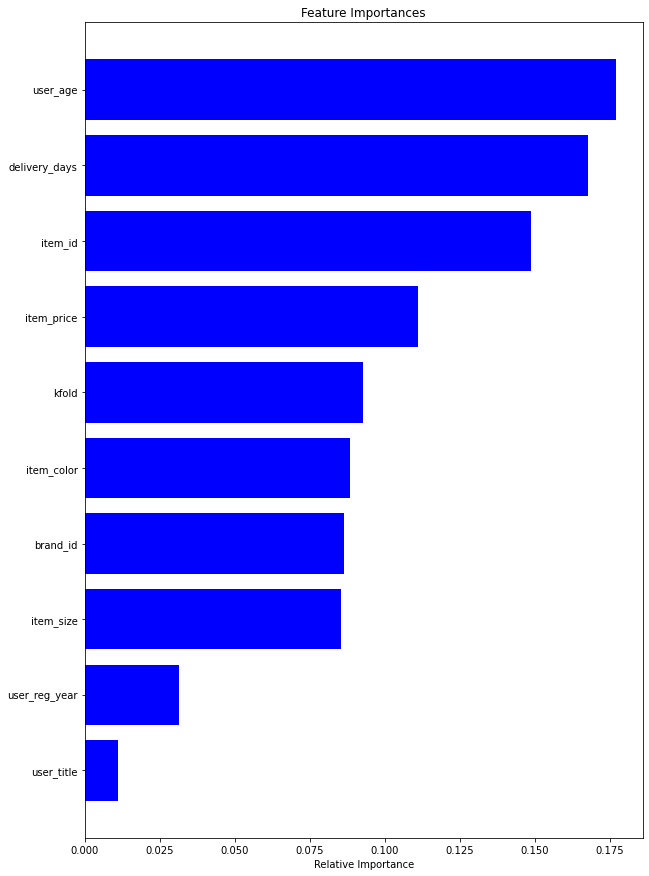

In [270]:
plt.figure(figsize=(10,15))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [271]:
#Let's try to drop user_age

In [272]:
X_train_user_age,X_test_user_age=X_train.drop(['user_age'],1),X_test.drop(['user_age'],1)

In [273]:
randfrstclassifier=RandomForestClassifier(n_estimators=300,n_jobs=-1)
randfrstclassifier.fit(X_train_user_age,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=-1, oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [274]:
y_preds=randfrstclassifier.predict(X_test_user_age)

In [275]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.64      0.64      0.64      8566
           1       0.58      0.58      0.58      7226

    accuracy                           0.61     15792
   macro avg       0.61      0.61      0.61     15792
weighted avg       0.61      0.61      0.61     15792



In [276]:
df_modeling_5_test

item_id  item_size  item_color  ...  user_age  kfold  user_reg_year
0          643          0           6  ...        52      0              1
1          195         10           5  ...        51      0              0
2           25         10           5  ...        51      0              0
3          173          6           3  ...        61      0              0
4          394          2           1  ...        61      0              1
...        ...        ...         ...  ...       ...    ...            ...
79940       39          3           2  ...        80      4              1
79941     1498          4           4  ...        59      4              1
79942     1806          8           3  ...        50      4              0
79943     1530          5           1  ...        50      4              1
79944      156          7           3  ...        62      4              0

[78958 rows x 11 columns]

In [277]:
xgb=XGBClassifier(learning_rate=0.15,colsample_bytree=0.7,max_depth=3,min_child_weight=7,gamma=0.4)
xgb.fit(X_train_user_age,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0.4,
              learning_rate=0.15, max_delta_step=0, max_depth=3,
              min_child_weight=7, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [278]:

from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors = 7)

In [279]:
KNN.fit(X_train_user_age,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

In [280]:
y_preds=KNN.predict(X_test_user_age)

In [281]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.63      0.64      0.64      8566
           1       0.57      0.55      0.56      7226

    accuracy                           0.60     15792
   macro avg       0.60      0.60      0.60     15792
weighted avg       0.60      0.60      0.60     15792



#Well We are getting at best 64% Accuracy with RandomForest Classifier till now....We will use it for Predictions on the Test Data

In [282]:
files.upload()

Saving TestingData_For_Candidate.xlsx to TestingData_For_Candidate.xlsx


{'TestingData_For_Candidate.xlsx': b'PK\x03\x04\x14\x00\x06\x00\x08\x00\x00\x00!\x00b\xee\x9dh^\x01\x00\x00\x90\x04\x00\x00\x13\x00\x08\x02[Content_Types].xml \xa2\x04\x02(\xa0\x00\x02\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00

In [376]:
test_data=pd.read_excel('TestingData_For_Candidate.xlsx')

In [377]:
test_data

order_item_id order_date  ... user_state  user_reg_date
0                 26 2016-06-23  ...       1010     2016-03-24
1                 28 2016-06-23  ...       1010     2016-03-24
2                 37 2016-06-23  ...       1001     2015-02-17
3                 56 2016-06-23  ...       1008     2016-01-21
4                 65 2016-06-23  ...       1001     2015-02-17
...              ...        ...  ...        ...            ...
20050          99935 2016-09-11  ...       1001     2015-10-06
20051          99943 2016-09-11  ...       1008     2016-09-12
20052          99952 2016-09-11  ...       1007     2016-09-12
20053          99986 2016-09-11  ...       1008     2016-01-20
20054          99996 2016-09-11  ...       1011     2015-02-17

[20055 rows x 13 columns]

Converting and Engineering the Test data as per the training Data.....It would have been a good idea to combine the Data first and then do the conversion on both together...but for next attempt

In [378]:
test_data.drop(['order_item_id'],1,inplace=True)

In [379]:
check_for_date_cols(test_data)

order_date delivery_date  item_id  ...   user_dob user_state  user_reg_date
0     2016-06-23    2016-06-26       92  ... 1962-04-14       1010     2016-03-24
1     2016-06-23    2016-07-02        2  ... 1962-04-14       1010     2016-03-24
2     2016-06-23    2016-06-26      895  ... 1964-04-27       1001     2015-02-17
3     2016-06-23           NaT        5  ... 1966-05-13       1008     2016-01-21
4     2016-06-23           NaT       55  ... 1957-03-11       1001     2015-02-17
...          ...           ...      ...  ...        ...        ...            ...
20050 2016-09-11    2016-09-13     2217  ... 1965-11-15       1001     2015-10-06
20051 2016-09-11    2016-11-16     1652  ... 1959-06-30       1008     2016-09-12
20052 2016-09-11    2016-09-14     1611  ... 1962-10-02       1007     2016-09-12
20053 2016-09-11    2016-09-12     1550  ...        NaT       1008     2016-01-20
20054 2016-09-11    2016-09-12      156  ... 1959-03-21       1011     2015-02-17

[20055 rows x 12 columns]

In [380]:
test_data['delivery_days']=0

In [381]:
for i in range(len(test_data)):
    if test_data['delivery_date'][i]<test_data['order_date'][i]:
        test_data['delivery_days'][i]=7
    else:
        test_data['delivery_days'][i]=(test_data['delivery_date'][i]-df['order_date'][i]).days
    

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoi

In [382]:
test_data.delivery_days=test_data.delivery_days.fillna(7.0)

In [383]:
test_data

order_date delivery_date  ...  user_reg_date delivery_days
0     2016-06-23    2016-06-26  ...     2016-03-24           4.0
1     2016-06-23    2016-07-02  ...     2016-03-24          10.0
2     2016-06-23    2016-06-26  ...     2015-02-17           4.0
3     2016-06-23           NaT  ...     2016-01-21           7.0
4     2016-06-23           NaT  ...     2015-02-17           7.0
...          ...           ...  ...            ...           ...
20050 2016-09-11    2016-09-13  ...     2015-10-06          81.0
20051 2016-09-11    2016-11-16  ...     2016-09-12         145.0
20052 2016-09-11    2016-09-14  ...     2016-09-12          82.0
20053 2016-09-11    2016-09-12  ...     2016-01-20          80.0
20054 2016-09-11    2016-09-12  ...     2015-02-17          80.0

[20055 rows x 13 columns]

In [384]:
test_data.user_dob.ffill()

0       1962-04-14
1       1962-04-14
2       1964-04-27
3       1966-05-13
4       1957-03-11
           ...    
20050   1965-11-15
20051   1959-06-30
20052   1962-10-02
20053   1962-10-02
20054   1959-03-21
Name: user_dob, Length: 20055, dtype: datetime64[ns]

In [385]:
test_data['user_age']=datetime.date.today().year-test_data['user_dob'].dt.year

In [386]:
test_data

order_date delivery_date  item_id  ... user_reg_date delivery_days  user_age
0     2016-06-23    2016-06-26       92  ...    2016-03-24           4.0      59.0
1     2016-06-23    2016-07-02        2  ...    2016-03-24          10.0      59.0
2     2016-06-23    2016-06-26      895  ...    2015-02-17           4.0      57.0
3     2016-06-23           NaT        5  ...    2016-01-21           7.0      55.0
4     2016-06-23           NaT       55  ...    2015-02-17           7.0      64.0
...          ...           ...      ...  ...           ...           ...       ...
20050 2016-09-11    2016-09-13     2217  ...    2015-10-06          81.0      56.0
20051 2016-09-11    2016-11-16     1652  ...    2016-09-12         145.0      62.0
20052 2016-09-11    2016-09-14     1611  ...    2016-09-12          82.0      59.0
20053 2016-09-11    2016-09-12     1550  ...    2016-01-20          80.0       NaN
20054 2016-09-11    2016-09-12      156  ...    2015-02-17          80.0      62.0

[20055 rows x 14 columns]

In [387]:
test_data.drop(['order_date','delivery_date','user_dob'],1,inplace=True)

In [388]:
test_data

item_id item_size item_color  ...  user_reg_date  delivery_days  user_age
0           92        xl  turquoise  ...     2016-03-24            4.0      59.0
1            2       xxl      green  ...     2016-03-24           10.0      59.0
2          895        38      white  ...     2015-02-17            4.0      57.0
3            5         l      white  ...     2016-01-21            7.0      55.0
4           55        40     purple  ...     2015-02-17            7.0      64.0
...        ...       ...        ...  ...            ...            ...       ...
20050     2217       128        red  ...     2015-10-06           81.0      56.0
20051     1652        39     purple  ...     2016-09-12          145.0      62.0
20052     1611        40      black  ...     2016-09-12           82.0      59.0
20053     1550         l      berry  ...     2016-01-20           80.0       NaN
20054      156        20       blue  ...     2015-02-17           80.0      62.0

[20055 rows x 11 columns]

In [389]:
color_list=[]
for i in test_data['item_color']:
  if i not in color_accepted:
    color_list.append('others')
  else:
    color_list.append(i)

In [390]:
color_list

['others',
 'green',
 'white',
 'white',
 'purple',
 'purple',
 'others',
 'black',
 'others',
 'purple',
 'others',
 'grey',
 'black',
 'purple',
 'black',
 'purple',
 'others',
 'others',
 'purple',
 'others',
 'white',
 'grey',
 'others',
 'others',
 'blue',
 'grey',
 'white',
 'others',
 'others',
 'red',
 'blue',
 'others',
 'blue',
 'others',
 'black',
 'petrol',
 'grey',
 'red',
 'others',
 'others',
 'black',
 'purple',
 'others',
 'others',
 'grey',
 'others',
 'black',
 'brown',
 'grey',
 'others',
 'blue',
 'others',
 'others',
 'purple',
 'purple',
 'others',
 'brown',
 'others',
 'black',
 'others',
 'white',
 'brown',
 'others',
 'grey',
 'blue',
 'grey',
 'others',
 'others',
 'black',
 'blue',
 'others',
 'anthracite',
 'white',
 'others',
 'others',
 'others',
 'grey',
 'black',
 'black',
 'purple',
 'black',
 'black',
 'black',
 'green',
 'others',
 'green',
 'black',
 'blue',
 'purple',
 'others',
 'brown',
 'grey',
 'brown',
 'grey',
 'black',
 'black',
 'black',
 '

In [391]:
test_data['item_color']=color_list

In [392]:
test_data

item_id item_size item_color  ...  user_reg_date  delivery_days  user_age
0           92        xl     others  ...     2016-03-24            4.0      59.0
1            2       xxl      green  ...     2016-03-24           10.0      59.0
2          895        38      white  ...     2015-02-17            4.0      57.0
3            5         l      white  ...     2016-01-21            7.0      55.0
4           55        40     purple  ...     2015-02-17            7.0      64.0
...        ...       ...        ...  ...            ...            ...       ...
20050     2217       128        red  ...     2015-10-06           81.0      56.0
20051     1652        39     purple  ...     2016-09-12          145.0      62.0
20052     1611        40      black  ...     2016-09-12           82.0      59.0
20053     1550         l     others  ...     2016-01-20           80.0       NaN
20054      156        20       blue  ...     2015-02-17           80.0      62.0

[20055 rows x 11 columns]

In [393]:
size_list=[]
for i in test_data['item_size']:
  if i not in size_accepted:
    size_list.append('others')
  else:
    size_list.append(i)

In [394]:
test_data['item_size']=size_list

In [395]:
test_data

item_id item_size item_color  ...  user_reg_date  delivery_days  user_age
0           92        xl     others  ...     2016-03-24            4.0      59.0
1            2       xxl      green  ...     2016-03-24           10.0      59.0
2          895    others      white  ...     2015-02-17            4.0      57.0
3            5         l      white  ...     2016-01-21            7.0      55.0
4           55    others     purple  ...     2015-02-17            7.0      64.0
...        ...       ...        ...  ...            ...            ...       ...
20050     2217    others        red  ...     2015-10-06           81.0      56.0
20051     1652    others     purple  ...     2016-09-12          145.0      62.0
20052     1611    others      black  ...     2016-09-12           82.0      59.0
20053     1550         l     others  ...     2016-01-20           80.0       NaN
20054      156    others       blue  ...     2015-02-17           80.0      62.0

[20055 rows x 11 columns]

In [396]:
test_data['user_reg_year']=test_data['user_reg_date'].dt.year

In [397]:
test_data

item_id item_size item_color  ...  delivery_days  user_age  user_reg_year
0           92        xl     others  ...            4.0      59.0           2016
1            2       xxl      green  ...           10.0      59.0           2016
2          895    others      white  ...            4.0      57.0           2015
3            5         l      white  ...            7.0      55.0           2016
4           55    others     purple  ...            7.0      64.0           2015
...        ...       ...        ...  ...            ...       ...            ...
20050     2217    others        red  ...           81.0      56.0           2015
20051     1652    others     purple  ...          145.0      62.0           2016
20052     1611    others      black  ...           82.0      59.0           2016
20053     1550         l     others  ...           80.0       NaN           2016
20054      156    others       blue  ...           80.0      62.0           2015

[20055 rows x 12 columns]

In [398]:
test_data.drop(['user_reg_date'],1,inplace=True)

In [399]:
test_data.drop(['user_id','user_state'],1,inplace=True)

In [400]:
test_data.item_color.value_counts()

others        5536
black         3720
blue          2129
grey          1749
brown         1710
red           1472
green         1069
purple         794
petrol         716
white          634
anthracite     526
Name: item_color, dtype: int64

In [401]:
test_data['item_color']=LE.fit_transform(test_data['item_color'])

In [402]:
test_data['item_size']=LE.fit_transform(test_data['item_size'])

In [403]:
test_data['user_title']=LE.fit_transform(test_data['user_title'])

In [404]:
test_data

item_id  item_size  item_color  ...  delivery_days  user_age  user_reg_year
0           92          4           6  ...            4.0      59.0           2016
1            2          5           4  ...           10.0      59.0           2016
2          895          2          10  ...            4.0      57.0           2015
3            5          0          10  ...            7.0      55.0           2016
4           55          2           8  ...            7.0      64.0           2015
...        ...        ...         ...  ...            ...       ...            ...
20050     2217          2           9  ...           81.0      56.0           2015
20051     1652          2           8  ...          145.0      62.0           2016
20052     1611          2           1  ...           82.0      59.0           2016
20053     1550          0           6  ...           80.0       NaN           2016
20054      156          2           2  ...           80.0      62.0           2015

[20055 rows x 9 columns]

In [405]:
test_data['user_reg_year']=LE.fit_transform(test_data['user_reg_year'])

In [406]:
test_data

item_id  item_size  item_color  ...  delivery_days  user_age  user_reg_year
0           92          4           6  ...            4.0      59.0              1
1            2          5           4  ...           10.0      59.0              1
2          895          2          10  ...            4.0      57.0              0
3            5          0          10  ...            7.0      55.0              1
4           55          2           8  ...            7.0      64.0              0
...        ...        ...         ...  ...            ...       ...            ...
20050     2217          2           9  ...           81.0      56.0              0
20051     1652          2           8  ...          145.0      62.0              1
20052     1611          2           1  ...           82.0      59.0              1
20053     1550          0           6  ...           80.0       NaN              1
20054      156          2           2  ...           80.0      62.0              0

[20055 rows x 9 columns]

In [407]:
y_results=randfrstclassifier.predict(test_data)

ValueError: ignored

In [412]:
test_data.user_age.fillna(57,inplace=True)#Filling the users age with mean of Training Data

In [413]:
y_results=randfrstclassifier.predict(test_data)

In [417]:
y_results=pd.DataFrame(y_results)

In [422]:
y_results.to_csv('Test_Results.csv')

In [423]:
y_results.shape

(20055, 1)